In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('vacation.csv', index_col = 'Month', parse_dates = True)
df.index.freq = 'MS'
df

,Num_Search_Vacation
Month,
2004-01-01,94
2004-02-01,89
2004-03-01,86
2004-04-01,79
2004-05-01,89
...,...
2019-06-01,58
2019-07-01,56
2019-08-01,45


<AxesSubplot:xlabel='Month'>

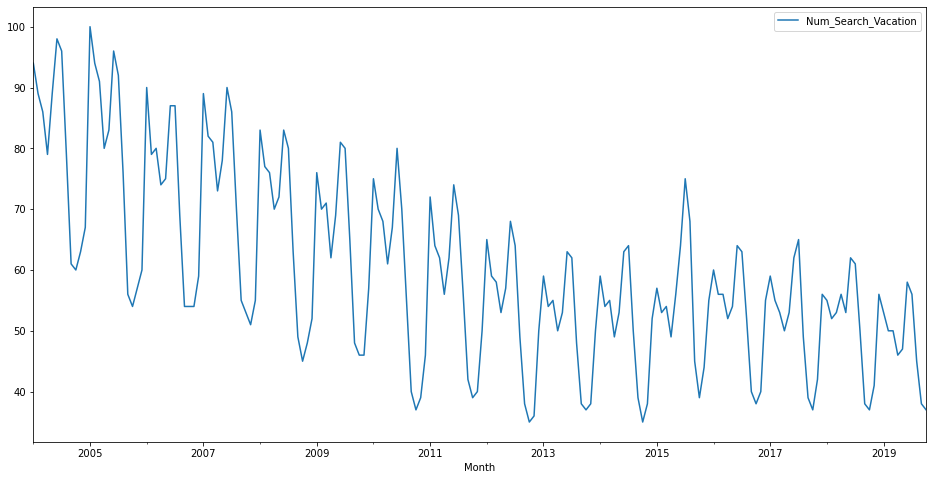

In [4]:
plt.rc("figure", figsize = (16, 8))
df.plot()

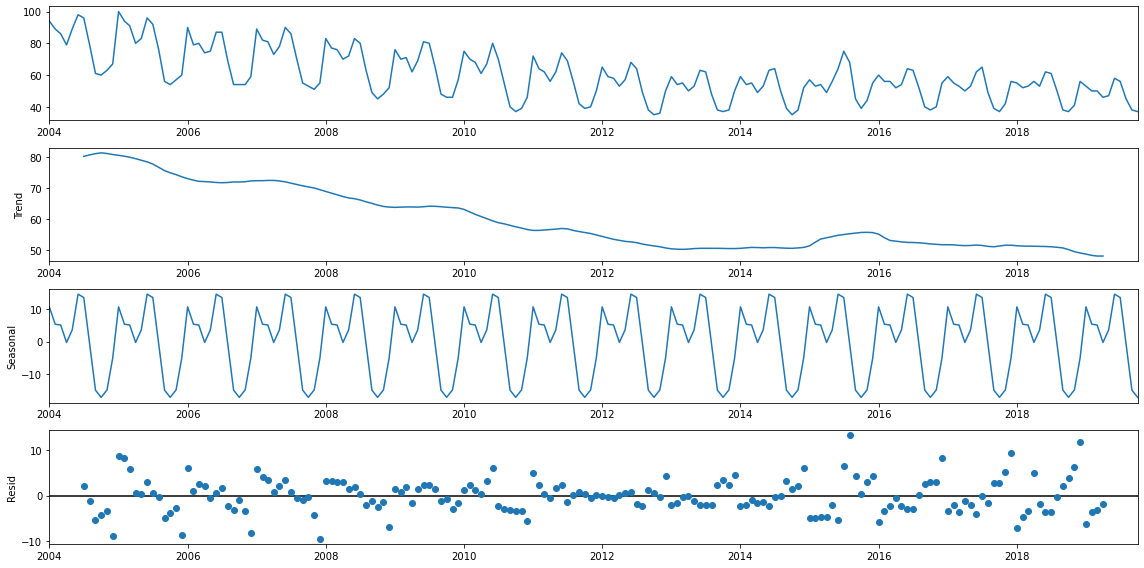

In [8]:
sdResult = seasonal_decompose(df)
sdResult.plot();

In [10]:
df1 = df.diff().dropna()
df1

,Num_Search_Vacation
Month,
2004-02-01,-5.0
2004-03-01,-3.0
2004-04-01,-7.0
2004-05-01,10.0
2004-06-01,9.0
...,...
2019-06-01,11.0
2019-07-01,-2.0
2019-08-01,-11.0


<AxesSubplot:xlabel='Month'>

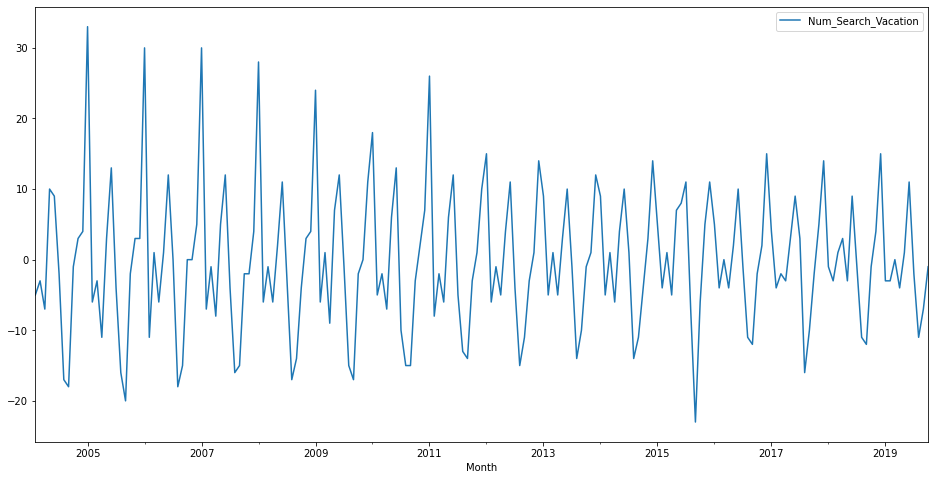

In [11]:
df1.plot()

In [12]:
test = pd.DataFrame({'Col1' : [10, 20, 13, 30, 45], 'Col2' : [56, 3, 3, 70, 5], 'Col3' : [90, 12, 23, 3, 45]}, \
                    index = pd.date_range("2022-01-01", "2022-01-05"))
test

,Col1,Col2,Col3
2022-01-01,10,56,90
2022-01-02,20,3,12
2022-01-03,13,3,23
2022-01-04,30,70,3
2022-01-05,45,5,45


In [14]:
test.shift(periods = 1)

,Col1,Col2,Col3
2022-01-01,NaN,NaN,NaN
2022-01-02,10.0,56.0,90.0
2022-01-03,20.0,3.0,12.0
2022-01-04,13.0,3.0,23.0
2022-01-05,30.0,70.0,3.0


### Using shift function to create a DataFrame that contains the current value and last 12 values

In [15]:
for i in range(12, 0, -1):
    df1['t-' + str(i)] = df1['Num_Search_Vacation'].shift(i)

12
11
10
9
8
7
6
5
4
3
2
1


In [17]:
df1.dropna(inplace = True)
df1

,Num_Search_Vacation,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
Month,,,,,,,,,,,,,
2005-02-01,-6.0,-5.0,-3.0,-7.0,10.0,9.0,-2.0,-17.0,-18.0,-1.0,3.0,4.0,33.0
2005-03-01,-3.0,-3.0,-7.0,10.0,9.0,-2.0,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0
2005-04-01,-11.0,-7.0,10.0,9.0,-2.0,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0
2005-05-01,3.0,10.0,9.0,-2.0,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0
2005-06-01,13.0,9.0,-2.0,-17.0,-18.0,-1.0,3.0,4.0,33.0,-6.0,-3.0,-11.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01,11.0,9.0,-1.0,-11.0,-12.0,-1.0,4.0,15.0,-3.0,-3.0,0.0,-4.0,1.0
2019-07-01,-2.0,-1.0,-11.0,-12.0,-1.0,4.0,15.0,-3.0,-3.0,0.0,-4.0,1.0,11.0
2019-08-01,-11.0,-11.0,-12.0,-1.0,4.0,15.0,-3.0,-3.0,0.0,-4.0,1.0,11.0,-2.0


### Previous values we can use to forecast

In [19]:
X = df1.iloc[:, 1:].values
X

array([[ -5.,  -3.,  -7., ...,   3.,   4.,  33.],
       [ -3.,  -7.,  10., ...,   4.,  33.,  -6.],
       [ -7.,  10.,   9., ...,  33.,  -6.,  -3.],
       ...,
       [-11., -12.,  -1., ...,   1.,  11.,  -2.],
       [-12.,  -1.,   4., ...,  11.,  -2., -11.],
       [ -1.,   4.,  15., ...,  -2., -11.,  -7.]])

### Current values to compare them to forecast

In [20]:
Y = df1.iloc[:, 0].values
Y

array([ -6.,  -3., -11.,   3.,  13.,  -4., -16., -20.,  -2.,   3.,   3.,
        30., -11.,   1.,  -6.,   1.,  12.,   0., -18., -15.,   0.,   0.,
         5.,  30.,  -7.,  -1.,  -8.,   5.,  12.,  -4., -16., -15.,  -2.,
        -2.,   4.,  28.,  -6.,  -1.,  -6.,   2.,  11.,  -3., -17., -14.,
        -4.,   3.,   4.,  24.,  -6.,   1.,  -9.,   7.,  12.,  -1., -15.,
       -17.,  -2.,   0.,  11.,  18.,  -5.,  -2.,  -7.,   6.,  13., -10.,
       -15., -15.,  -3.,   2.,   7.,  26.,  -8.,  -2.,  -6.,   6.,  12.,
        -5., -13., -14.,  -3.,   1.,  10.,  15.,  -6.,  -1.,  -5.,   4.,
        11.,  -4., -15., -11.,  -3.,   1.,  14.,   9.,  -5.,   1.,  -5.,
         3.,  10.,  -1., -14., -10.,  -1.,   1.,  12.,   9.,  -5.,   1.,
        -6.,   4.,  10.,   1., -14., -11.,  -4.,   3.,  14.,   5.,  -4.,
         1.,  -5.,   7.,   8.,  11.,  -7., -23.,  -6.,   5.,  11.,   5.,
        -4.,   0.,  -4.,   2.,  10.,  -1., -11., -12.,  -2.,   2.,  15.,
         4.,  -4.,  -2.,  -3.,   3.,   9.,   3., -1

### train-test split

In [25]:
nSplit = int(len(X) * 0.8)
Ytrain, Ytest = Y[0:nSplit], Y[nSplit:]
Xtrain, Xtest = X[0:nSplit, :], X[nSplit:, :]

### Creating decision tree

In [27]:
decisionTree = DecisionTreeRegressor(max_depth = 4)
decisionTree.fit(Xtrain, Ytrain)

DecisionTreeRegressor(max_depth=4)

In [28]:
print(decisionTree.score(Xtrain, Ytrain))
print(decisionTree.score(Xtest, Ytest))

0.9501393581405474
0.6025434316102595


##### good fit on train, bad fit on test

### Checking if we can improve accuracy by increasing depth

In [31]:
for d in range(1, 10):
    decisionTree = DecisionTreeRegressor(max_depth = d)
    decisionTree.fit(Xtrain, Ytrain)
    print('Max depth = ' + str(d))
    print('Train score = ' + str(decisionTree.score(Xtrain, Ytrain)))
    print('Test score = ' + str(decisionTree.score(Xtest, Ytest)))
    print()

Max depth = 1
Train score = 0.5676447032555711
Test score = 0.23402120549636607

Max depth = 2
Train score = 0.8357156950064545
Test score = 0.49650512194212104

Max depth = 3
Train score = 0.9195415307259163
Test score = 0.5349600314180801

Max depth = 4
Train score = 0.9501393581405474
Test score = 0.6025434316102595

Max depth = 5
Train score = 0.9713110712833641
Test score = 0.6027561778028094

Max depth = 6
Train score = 0.9847865245362175
Test score = 0.5625635724643789

Max depth = 7
Train score = 0.9934289152661993
Test score = 0.5662534830682213

Max depth = 8
Train score = 0.997918733866671
Test score = 0.5310319059041817

Max depth = 9
Train score = 0.9993629856502978
Test score = 0.5258709328973682



##### Can't improve the accuracy on test above 0.6

In [33]:
train_prediction = decisionTree.predict(Xtrain)
test_prediction = decisionTree.predict(Xtest)

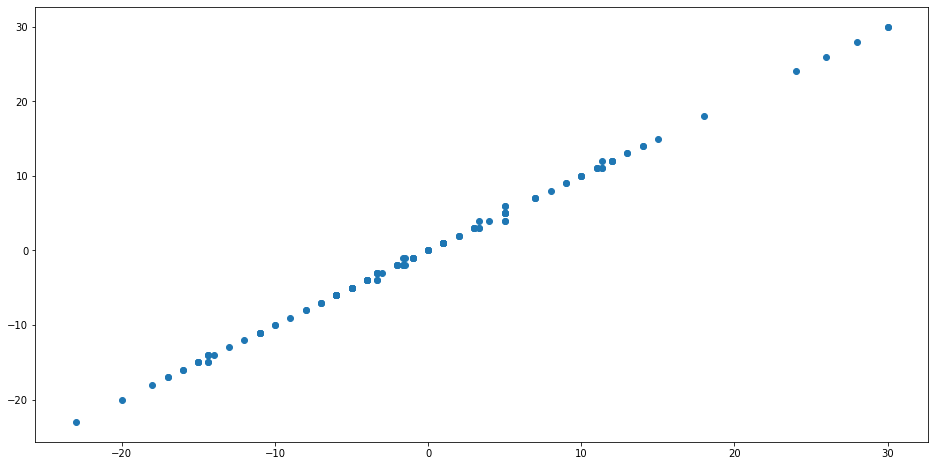

In [34]:
plt.scatter(train_prediction, Ytrain, label = 'Train')
plt.show()

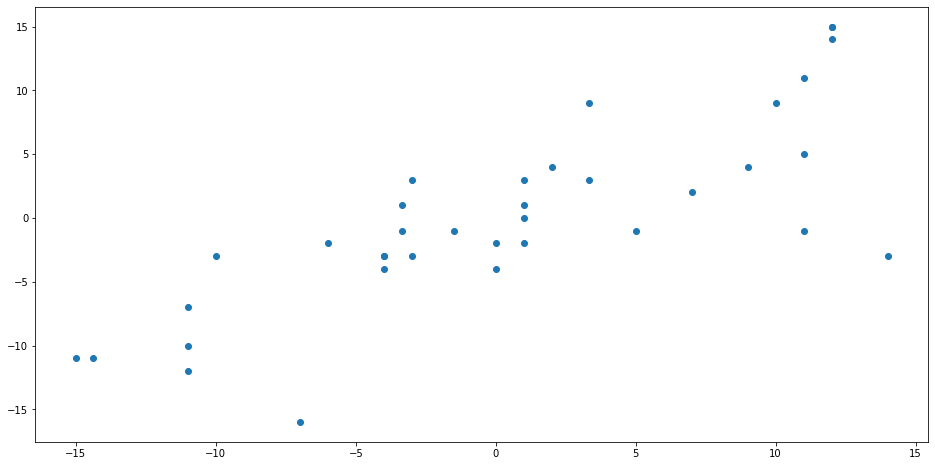

In [35]:
plt.scatter(test_prediction, Ytest, label = 'Test')
plt.show()